# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [3]:
# WRITE YOUR CODE HERE
library(tidyverse)
#couldn't get setwd to work, so I looaded the file locally on colab
setwd("/content/")
d1 <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv") 
d1 <- d1 %>%
  select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na()

head(d1)
  



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

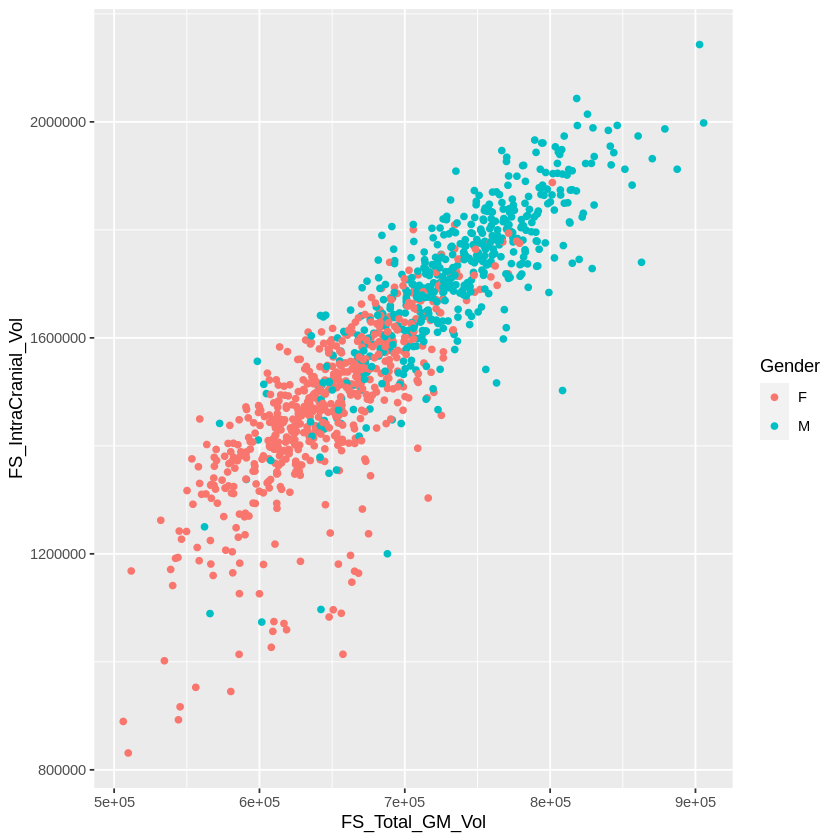

In [4]:
# WRITE YOUR CODE HERE

ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point()



What patterns do you observe in the scatter plot?

> There seems to be a linear relationship between grey matter volume and intracranial volume. It also seems that the females have generally lower grey matter volume and intracranial volume than the males.
> 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [5]:
# WRITE YOUR CODE HERE
d1$Gender <- as.factor(d1$Gender)
gender_glm <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=d1, family=binomial)
summary(gender_glm)
contrasts(d1$Gender)




Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


,M
F,0
M,1


Which factors are signficantly associated with gender?

> Grey matter volume and intracranial volume are significantly assocaited with gender.
> 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [6]:
# WRITE YOUR CODE HERE
pred <- data.frame(predict(gender_glm, type = "response"))
colnames(pred) = c('predicted_prob')

threshold = 0.50
num_observations = nrow(pred)
pred$predicted_binary=rep("F",num_observations)
pred$predicted_binary[pred$predicted_prob>threshold]="M"
confusion_df = data.frame(pred$predicted_binary, d1$Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))



         actual
predicted   F   M
        F 516 110
        M  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

>Prediction accuracy for the full model is about 82%
> 

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.8203055

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.8203055 -0.0005534591  0.01214399


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

[1] "SD =  0.0121439875181248"
[1] "95% CI [ 0.795464046527093 , 0.844039996599592 ]"


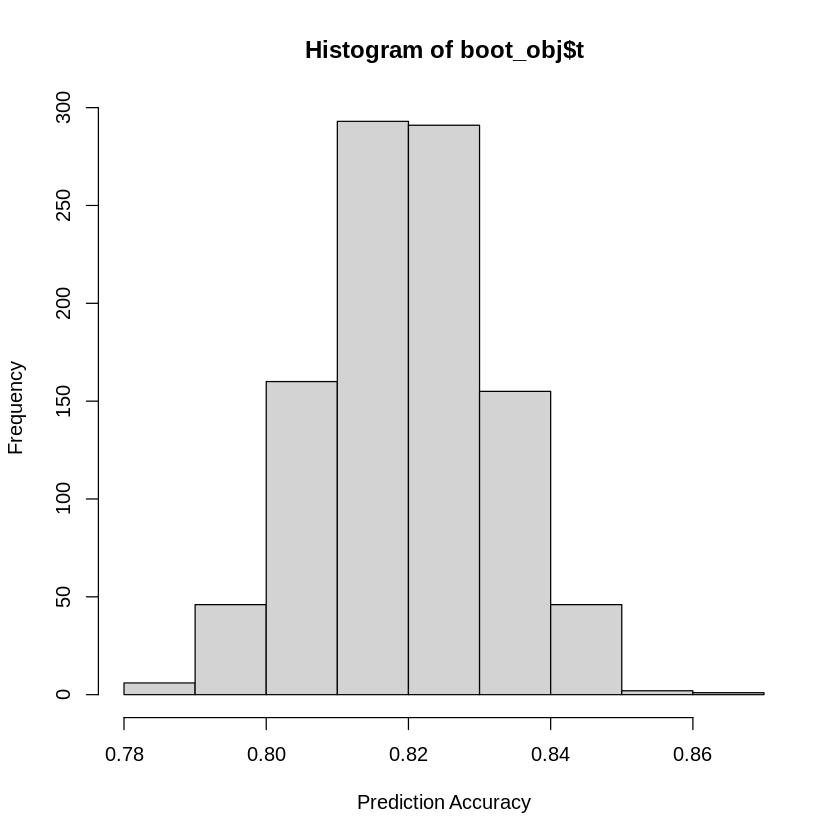

In [7]:
# WRITE YOUR CODE HERE
library(boot)

boot.fn <- function(data, index){  
  gender_glm <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=data, family=binomial, subset=index)
  pred <- data.frame(predict(gender_glm, type = "response"))
  colnames(pred) = c('predicted_prob')
  threshold = 0.50
  num_observations = nrow(pred)
  pred$predicted_binary=rep("F",num_observations)
  pred$predicted_binary[pred$predicted_prob>threshold]="M"
  confusion_df = data.frame(pred$predicted_binary, d1$Gender[index])
  colnames(confusion_df) = c('predicted', 'actual')
  acc <- mean(confusion_df$predicted == confusion_df$actual)
  return(acc)
}

#sanity check
print(boot.fn(d1, 1:1113))

boot_obj = boot(d1, boot.fn, R=1000)
print(boot_obj)
attributes(boot_obj)

hist(boot_obj$t, xlab="Prediction Accuracy")
print(paste("SD = ", sd(boot_obj$t)))
print(paste("95% CI [", (mean(boot_obj$t) - 2*sd(boot_obj$t)), ",", (mean(boot_obj$t) + 2*sd(boot_obj$t)), "]"))


How robust is the prediction accuracy of the full model?

> 95% CI [0.795, 0.844] 

> It seems that prediction accuracy of the full model is robust because it is within the confidence interval range.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

0.8032345
0.8104223
0.8041330
0.8113208
0.8059299
0.8050314


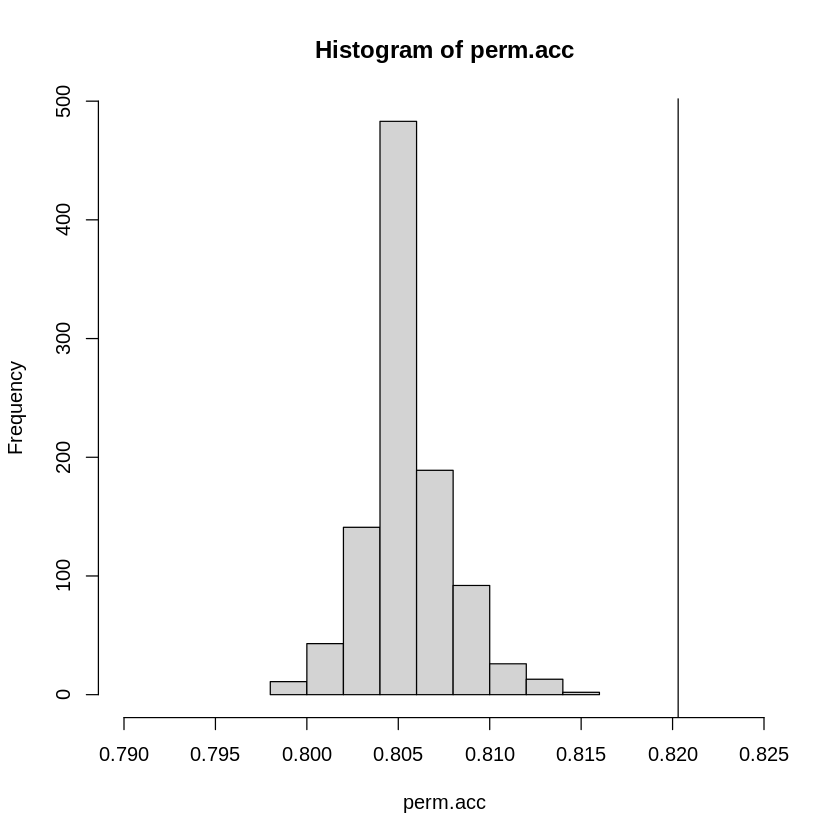

In [8]:
# WRITE YOUR CODE HERE
permd1 <- d1

R=1000
perm.acc=matrix(NA,nrow=R, ncol=1)

for (i in 1:R){
  permd1$FS_Total_GM_Vol = d1$FS_Total_GM_Vol[sample(1113)]
  gender_glm <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=permd1, family=binomial)
  pred <- data.frame(predict(gender_glm, type = "response"))
  colnames(pred) = c('predicted_prob')
  threshold = 0.50
  num_observations = nrow(pred)
  pred$predicted_binary=rep("F",num_observations)
  pred$predicted_binary[pred$predicted_prob>threshold]="M"
  confusion_df = data.frame(pred$predicted_binary, d1$Gender)
  colnames(confusion_df) = c('predicted', 'actual')
  perm.acc[i,] = mean(confusion_df$predicted == confusion_df$actual)
}

head(perm.acc)
hist(perm.acc, xlim=c(0.79,0.825))
abline(v=0.820305480682839, untf = FALSE)


How much does the grey matter volume influence the prediction accuracy of the model?

> It seems that grey matter volume has a significant influence on the prediction accuracy of the model, because when the grey matter volume predictor is randomized, the distribution of the permutated model accuracies does not include the original model accuracy of 0.82
> 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> The bootstrap entails simulating replications of your dataset to estimate the confidence of effects shown in your model. To do so, it generates a new dataset by randomly sampling (with replacement) from the original dataset. It is appropriate to use the bootstrap when you would like to know the confidence of the estimated effect of your model, which would essentially be useful in any scenerio.
> Permutation tests entail generating a null hypothesis distribution by scrambling your predictors to break the relationship between X and Y and creating a new model based on these data. This is done m times to create the null distribution. This is appropriate to use when you do not want to make assumptions about your null distribution and can assume completely random links across observations. Thus, in certain situations (i.e. working with time series data.

**DUE:** 5pm EST, March 29, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*